11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.5719 - val_loss: 0.2817
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2711 - val_loss: 0.2505
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2415 - val_loss: 0.2327
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2244 - val_loss: 0.2165
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2048 - val_loss: 0.2000
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1882 - val_loss: 0.1897
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1794 - val_loss: 0.1852
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1736 - val_loss: 0.1759
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1671 - val_loss: 0.1705
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1616 - val_loss: 0.1664
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


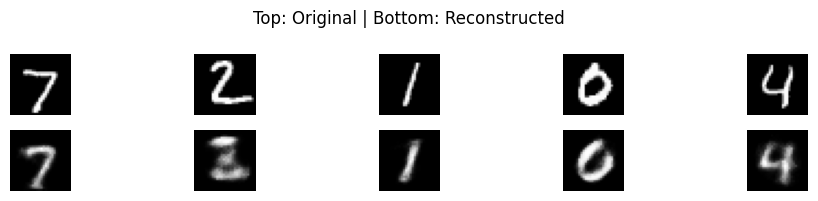

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load a small subset of MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:2000].astype("float32") / 255.
x_test = x_test[:100].astype("float32") / 255.
x_train = np.reshape(x_train, (-1, 28 * 28))  # Flatten
x_test = np.reshape(x_test, (-1, 28 * 28))    # Flatten

# Build the Autoencoder from scratch
input_dim = 784  # 28x28
encoding_dim = 32  # Latent space size

# Encoder
input_img = tf.keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded_output = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(encoded_output)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded_output = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Combine into Autoencoder
autoencoder = tf.keras.Model(input_img, decoded_output)

# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

# Test reconstruction
decoded_imgs = autoencoder.predict(x_test[:5])

# Plot input vs output
plt.figure(figsize=(10, 2))
for i in range(5):
    # Original
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Reconstructed
    plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Top: Original | Bottom: Reconstructed")
plt.tight_layout()
plt.show()
